#### OBJETIVO: Analisis de las estaciones de monitoreo de PM2.5 en los centros urbanos seleccionados. Se hacen distintos plots

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import locale


In [ ]:
### Generar un dataframe con el numero de datos entrnamiento-testeo
datos = pd.DataFrame({
    "Sitio": np.repeat(["SP", "ST", "BA", "MD", "MX"], 2),
    "Tipo": np.tile(["Entrenamiento", "Testeo"], 5),
    "Observaciones": [8867, 3799, 15800, 6768, 2421, 1035, 4695, 2009, 16077, 6887]
})

print(datos)

  Sitio           Tipo  Observaciones
0    SP  Entrenamiento           8867
1    SP         Testeo           3799
2    ST  Entrenamiento          15800
3    ST         Testeo           6768
4    BA  Entrenamiento           2421
5    BA         Testeo           1035
6    MD  Entrenamiento           4695
7    MD         Testeo           2009
8    MX  Entrenamiento          16077
9    MX         Testeo           6887


In [10]:
# Se ordena el dataset segun el numero de datos (entrenamiento y testeo) para hacer el plot
orden_sitios = (
    datos
    .groupby("Sitio", as_index=False)["Observaciones"]
    .sum()
    .sort_values("Observaciones")
    ["Sitio"]
    .tolist()
)

print(orden_sitios)



['BA', 'MD', 'SP', 'ST', 'MX']


C:\Users\Josefina Urquiza\AppData\Local\Temp\ipykernel_15880\2093315385.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Sitio", as_index=False)["Observaciones"]


In [ ]:
# Poner en formato de categorical para poder ordenar los datos

datos["Sitio"] = pd.Categorical(
    datos["Sitio"],
    categories=orden_sitios,
    ordered=True
)
print(datos)

  Sitio           Tipo  Observaciones
0    SP  Entrenamiento           8867
1    SP         Testeo           3799
2    ST  Entrenamiento          15800
3    ST         Testeo           6768
4    BA  Entrenamiento           2421
5    BA         Testeo           1035
6    MD  Entrenamiento           4695
7    MD         Testeo           2009
8    MX  Entrenamiento          16077
9    MX         Testeo           6887


In [ ]:
# Agrupar los dtos por ciudades
datos_prop = datos.copy()

datos_prop["prop"] = (
    datos_prop["Observaciones"]
    / datos_prop.groupby("Sitio")["Observaciones"].transform("sum")
)
tabla = datos_prop.pivot(
    index="Sitio",
    columns="Tipo",
    values="prop"
)

tabla_obs = datos_prop.pivot(
    index="Sitio",
    columns="Tipo",
    values="Observaciones"
)

#Poner en formato de porcentaje
tabla_pct = tabla * 100


C:\Users\Josefina Urquiza\AppData\Local\Temp\ipykernel_15880\2656962190.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  / datos_prop.groupby("Sitio")["Observaciones"].transform("sum")


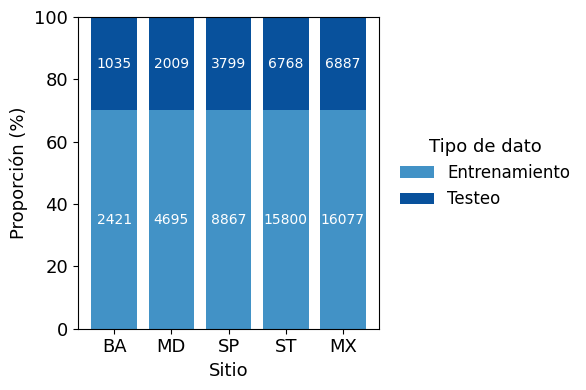

In [ ]:
# Figuara para mostrar cantidad de datos por entrenamiento/testeo
fig, ax = plt.subplots(figsize=(6, 4))

bottom = np.zeros(len(tabla_pct))

colors = {
    "Entrenamiento": "#4292c6",
    "Testeo": "#08519c"
}

for tipo in tabla_pct.columns:
    ax.bar(
        tabla_pct.index,
        tabla_pct[tipo],
        bottom=bottom,
        label=tipo,
        color=colors[tipo]
    )

    # Texto centrado
    for i, sitio in enumerate(tabla_pct.index):
        valor = tabla_pct[tipo].iloc[i]
        obs = tabla_obs[tipo].iloc[i]
        if not np.isnan(valor):
            ax.text(
                i,
                bottom[i] + valor / 2,
                f"{int(obs)}",
                ha="center",
                va="center",
                color="white",
                fontsize=10
            )

    bottom += tabla_pct[tipo].values
ax.set_xlabel("Sitio", fontsize=13)
ax.set_ylabel("Proporción (%)", fontsize=13)

ax.set_ylim(0, 100)

ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)

ax.legend(
    title="Tipo de dato",
    fontsize=12,
    title_fontsize=13,
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=False
)


plt.tight_layout()
plt.show()



#### Analisis por centro urbano

In [35]:
# Se lee el archivo generado con todas las variables
estacion = "SP"
ruta_estaciones = (
    f"D:/Josefina/Proyectos/ProyectoChile/"
    f"{estacion}/proceed/06_estaciones/"
    f"{estacion}_estaciones.csv"
)
data  = pd.read_csv(ruta_estaciones)

#Poner en formato fecha
data['date'] = pd.to_datetime(
    data['date'],
    format="%d/%m/%Y",
    errors="coerce"
)

print(data)

       Unnamed: 0       date  ID                    estacion       mean  min  \
0            1333 2015-01-01   3  Ciudad Universitaria - USP  13.500000    0   
1            9693 2015-01-01   7                  Ibirapuera  16.550000    0   
2           16135 2015-01-01  11     Marg.Tiete-Pte Remedios  23.791667    0   
3           27868 2015-01-01  17                   Pinheiros  16.166667    0   
4            2437 2015-01-02   3  Ciudad Universitaria - USP   3.777778    0   
...           ...        ...  ..                         ...        ...  ...   
35134        5971 2024-12-31  12                        Maua  11.000000    0   
35135        6963 2024-12-31  24                      Osasco  12.083333    0   
35136        7327 2024-12-31  22           Parque D.Pedro II  14.208333    0   
35137        8334 2024-12-31  16             Pico do Jaragua   9.333333    0   
35138       10920 2024-12-31  18                     Santana   9.875000    0   

       max         sd  
0       50  14.

In [ ]:
# Descartamos aquellas filas donde no hay datos de PM
data.dropna(subset=['mean'], inplace=True)

# Corroboramos si hay datos igual/distinto/mayor/menor  a 0
data = data[data["mean"] != 0]
data = data[data["mean"] > 0]


# Nos quedamos con la info entre 2015-2024
data = data[(data['date'].dt.year >= 2015) & (data['date'].dt.year < 2025)]

#Corroboranos
data['date'].dt.year.unique()



Index(['Unnamed: 0', 'date', 'ID', 'estacion', 'mean', 'min', 'max', 'sd'], dtype='object')

In [46]:
#Nombre de las variables
data.columns
# Resumen de las variabels
print("Media", np.mean(data['mean']))
print("SD", np.std(data['mean']))

Media 16.437405274761254
SD 10.334185600112987


In [ ]:
# Estadisticas basicas por estacion de monitoreo

resumen_por_estacion = (
    data
    .groupby("estacion", as_index=False)
    .agg(
        cantidad=("mean", "count"),
        promedio=("mean", "mean"),
        minimo=("mean", "min"),
        maximo=("mean", "max"),
        sd=("mean", "std")
    )
)

print(resumen_por_estacion)


                      estacion  cantidad   promedio    minimo      maximo  \
0                  Carapicuiba       365  18.888192  2.791667   76.875000   
1   Ciudad Universitaria - USP      3422  14.331265  1.000000   68.857143   
2         Guarulhos - Pimentas      3146  17.602875  2.166667   99.541667   
3    Guarulhos-Palco Municipal      2732  16.235248  1.933333   78.125000   
4                   Ibirapuera      3204  14.743610  1.583333   63.750000   
5                   Interlagos       320  15.668852  0.739130   68.304348   
6               Itaim Paulista      2892  17.047884  1.000000   85.041667   
7      Marg.Tiete-Pte Remedios      3583  19.570083  1.555556   95.708333   
8                         Maua      1826  14.672721  1.000000   76.083333   
9                       Osasco      2563  20.368470  1.000000  104.250000   
10           Parque D.Pedro II      2803  16.802371  1.500000   85.500000   
11             Pico do Jaragua      2800  12.982061  0.833333   89.739130   

In [52]:
#Cual es la estacion con los valores promedio min
estacion_min = resumen_por_estacion[
    resumen_por_estacion["promedio"] == resumen_por_estacion["promedio"].min()
]

print(estacion_min)
print("----------------------------------------------------------------------------")
#Cual es la estacion con los valores promedio max
estacion_max = resumen_por_estacion[
    resumen_por_estacion["promedio"] == resumen_por_estacion["promedio"].max()
]
print(estacion_max)

print("----------------------------------------------------------------------------")
#Cual es la estacion con los valores  max
estacion_maxTot = resumen_por_estacion[
    resumen_por_estacion["maximo"] == resumen_por_estacion["maximo"].max()
]
print(estacion_maxTot)


          estacion  cantidad  promedio  minimo     maximo         sd
15  Tabao da Serra       249  12.36603     1.0  65.619048  10.056467
----------------------------------------------------------------------------
  estacion  cantidad  promedio  minimo  maximo         sd
9   Osasco      2563  20.36847     1.0  104.25  12.133076
----------------------------------------------------------------------------
  estacion  cantidad  promedio  minimo  maximo         sd
9   Osasco      2563  20.36847     1.0  104.25  12.133076


In [60]:
#     Estadisticas basicas por estacion por mes
# Ver
try:
    locale.setlocale(locale.LC_TIME, "es_ES")
except:
    pass

resumen_por_mes = (
    data
    .assign(
        mes=data["date"].dt.month_name(locale="es_ES")  # nombre del mes
    )
    .groupby("mes", as_index=False)
    .agg(
        minimo=("mean", lambda x: round(x.min(skipna=True), 2)),
        maximo=("mean", lambda x: round(x.max(skipna=True), 2)),
        promedio=("mean", lambda x: round(x.mean(skipna=True), 2)),
        sd=("mean", lambda x: round(x.std(skipna=True), 2)),
    )
)

# Orden correcto de meses
orden_meses = [
    "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
]

resumen_por_mes["mes"] = pd.Categorical(
    resumen_por_mes["mes"],
    categories=orden_meses,
    ordered=True
)

resumen_por_mes = resumen_por_mes.sort_values("mes")

print(resumen_por_mes)
print(data["date"].dtype)


           mes  minimo  maximo  promedio     sd
3        Enero    1.00   71.80     11.77   5.70
4      Febrero    1.33   55.62     11.91   5.31
7        Marzo    0.74   41.92     12.94   5.56
0        Abril    0.91   59.62     14.58   7.48
8         Mayo    1.67   67.92     17.66   9.15
6        Junio    1.00   92.83     20.55  11.11
5        Julio    1.86   99.54     23.59  12.70
1       Agosto    1.62  104.25     21.03  13.06
11  Septiembre    0.70   95.71     23.17  14.91
10     Octubre    1.14   58.00     14.40   7.37
9    Noviembre    0.83   41.33     12.14   5.50
2    Diciembre    1.07   49.89     12.05   5.50
datetime64[ns]


In [61]:
# Obtener los 3 valores máximos únicos
top3_vals_max = (
    resumen_por_mes["maximo"]
    .dropna()
    .unique()
)

top3_vals_max = sorted(top3_vals_max, reverse=True)[:3]

# Filtrar filas que tienen esos valores
estacion_picos_max = resumen_por_mes[
    resumen_por_mes["maximo"].isin(top3_vals_max)
]

print(estacion_picos_max)


           mes  minimo  maximo  promedio     sd
5        Julio    1.86   99.54     23.59  12.70
1       Agosto    1.62  104.25     21.03  13.06
11  Septiembre    0.70   95.71     23.17  14.91
